In [134]:
import os 
import random
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data_path = "monkbrill-jpg/"
labels = []
for subdir in os.listdir(data_path):
    current_path = os.path.join(data_path, subdir)
    for file in os.listdir(current_path):
        current_path = os.path.join(data_path, subdir)
        labels.append(subdir)

In [120]:
random_char = random.choice(os.listdir(data_path))
random_folder = os.path.join(data_path, random_char)
random_file = random.choice(os.listdir(random_folder))

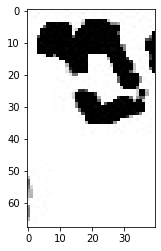

In [131]:
im = cv2.imread(os.path.join(random_folder, random_file), cv2.IMREAD_GRAYSCALE)
plt.imshow(im, cmap='gray')
plt.show()

In [37]:
def get_random_eraser(p=1, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        if input_img.ndim == 3:
            img_h, img_w, img_c = input_img.shape
        elif input_img.ndim == 2:
            img_h, img_w = input_img.shape

        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            if input_img.ndim == 3:
                c = np.random.uniform(v_l, v_h, (h, w, img_c))
            if input_img.ndim == 2:
                c = np.random.uniform(v_l, v_h, (h, w))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w] = c

        return input_img

    return eraser

In [106]:
# augmentation functions

def keep_original(img):
    return img

def erosion(img):
    kernel_size = random.randint(2, 4)
    kernel = np.ones((kernel_size,kernel_size), np.uint8)
    img = cv2.erode(img, kernel, iterations=1)
    return img

def dilation(img):
    kernel_size = random.randint(2, 4)
    kernel = np.ones((kernel_size,kernel_size), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    return img

def rotate(img):
    rows = img.shape[0]
    cols = img.shape[1]

    img_center = (cols / 2, rows / 2)
    M = cv2.getRotationMatrix2D(img_center, random.randint(-10, 10), 1)
    rotated_image = cv2.warpAffine(img, M, (cols, rows),
                           borderMode=cv2.BORDER_CONSTANT,
                           borderValue=(255))

    return rotated_image

def cutout(img):
    eraser = get_random_eraser(p=1, s_l=0.05, s_h=0.3, r_1=0.25, r_2=1/0.25, v_h=255, v_l=255, pixel_level=False)
    img = eraser(img)
    return img

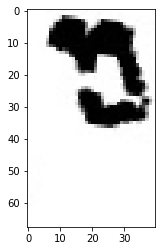

In [132]:
im = rotate(im)
plt.imshow(im, cmap='gray')
plt.show()


In [107]:
# dictionary of the transformations we defined earlier
available_transformations = {
    'original': keep_original,
    'rotation': rotate,
    'dilation': dilation,
    'erosion': erosion,
    'cutout': cutout
}

save_path = 'monkbrill-jpg-augmented/'

if not os.path.exists(save_path):
    os.makedirs(save_path)


In [109]:
# Create new augmented images and save in folder
# first a random character is chosen with even probability
# Then random image of that character is chosen
# Then one of the augmentation functions is applied and the image is saved

num_files_desired = 50000

num_generated_files = 0
while num_generated_files < num_files_desired:

    random_char = random.choice(os.listdir(data_path))
    random_folder = os.path.join(data_path, random_char)
    random_file = random.choice(os.listdir(random_folder))

    image_to_transform = cv2.imread(os.path.join(random_folder, random_file), cv2.IMREAD_GRAYSCALE)
    
    key = random.choice(list(available_transformations))
    transformed_image = available_transformations[key](image_to_transform)

    char_save = os.path.join(save_path, random_char)
    if not os.path.exists(char_save):
        os.makedirs(char_save)
    
    cv2.imwrite(os.path.join(char_save, random_char +'_aug_' + str(num_generated_files) + '.jpg'), transformed_image)
    

    num_generated_files += 1